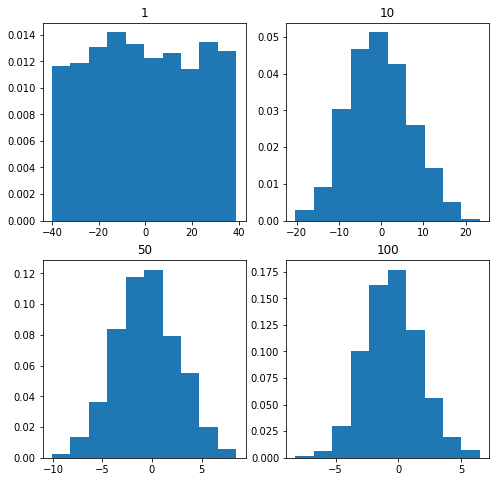

In [3]:
# Question 1
import numpy
import matplotlib.pyplot as plt
# number of sample
num = [1, 10, 50, 100] 
# list of sample means
means = [] 
 
# Generating 1, 10, 30, 100 random numbers from -40 to 40
# taking their mean and appending it to list means.
for j in num:
    # Generating seed so that we can get same result
    # every time the loop is run...
    numpy.random.seed(1)
    x = [numpy.mean(
        numpy.random.randint(
            -40, 40, j)) for _i in range(1000)]
    means.append(x)
k = 0
 
# plotting all the means in one figure
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        # Histogram for each x stored in means
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()


In [4]:
# Question 2
# Import required libraries
import numpy as np
import pandas as pd

# Set random seed
np.random.seed(42)

# Define total number of products
number_of_products = 10

# Create data dictionary
data = {'product_id':np.arange(1, number_of_products+1).tolist(),
       'measure':np.round(np.random.normal(loc=10, scale=0.5, size=number_of_products),3)}

# Transform dictionary into a data frame
df = pd.DataFrame(data)

# Store the real mean in a separate variable
real_mean = round(df['measure'].mean(),3)

# View data frame
df

,product_id,measure
0,1,10.248
1,2,9.931
2,3,10.324
3,4,10.762
4,5,9.883
5,6,9.883
6,7,10.790
7,8,10.384
8,9,9.765
9,10,10.271


In [5]:
# Obtain simple random sample
simple_random_sample = df.sample(n=4).sort_values(by='product_id')

# Save the sample mean in a separate variable
simple_random_mean = round(simple_random_sample['measure'].mean(),3)

# View sampled data frame
simple_random_sample

,product_id,measure
2,3,10.324
6,7,10.790
7,8,10.384
8,9,9.765


In [6]:
# Define systematic sampling function
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 3)

# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['measure'].mean(),3)

# View sampled data frame
systematic_sample

,product_id,measure
0,1,10.248
3,4,10.762
6,7,10.790
9,10,10.271


In [7]:
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)

        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indexes.append(i)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")
        
# Obtain a cluster sample and save it in a new variable
cluster_sample = cluster_sampling(df,5)

# Save the sample mean in a separate variable
cluster_mean = round(cluster_sample['measure'].mean(),3)

# View sampled data frame
cluster_sample

,product_id,measure,cluster_id
2,3,10.324,2
3,4,10.762,2
6,7,10.790,4
7,8,10.384,4


In [8]:
# Create data dictionary
data = {'product_id':np.arange(1, number_of_products+1).tolist(),
       'product_strata':np.repeat([1,2], number_of_products/2).tolist(),
       'measure':np.round(np.random.normal(loc=10, scale=0.5, size=number_of_products),3)}

# Transform dictionary into a data frame
df = pd.DataFrame(data)

# View data frame
df

,product_id,product_strata,measure
0,1,1,8.780
1,2,1,10.302
2,3,1,9.874
3,4,1,9.918
4,5,1,9.262
5,6,2,10.743
6,7,2,9.988
7,8,2,10.178
8,9,2,10.209
9,10,2,10.416


In [9]:
# Import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=4)

# Perform data frame split
for x, y in split.split(df, df['product_strata']):
    stratified_random_sample = df.iloc[y].sort_values(by='product_id')

# View sampled data frame
stratified_random_sample

# Obtain the sample mean for each group
stratified_random_sample.groupby('product_strata').mean().drop(['product_id'],axis=1)

,measure
product_strata,
1,9.327
2,10.476


In [10]:
# Create a dictionary with the mean outcomes for each sampling method and the real mean
outcomes = {'sample_mean':[simple_random_mean,systematic_mean,cluster_mean],
           'real_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Cluster Sampling'])

# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['real_mean'] - outcomes['sample_mean'])

# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,real_mean,abs_error
Simple Random Sampling,10.316,10.224,0.092
Systematic Sampling,10.518,10.224,0.294
Cluster Sampling,10.565,10.224,0.341


In [13]:
# Normal distribution
from scipy.stats import norm
    
numargs = norm.numargs 
a, b = 4.32, 3.18
rv = norm(a, b) 
    
print ("RV : \n", rv)  

RV : 


In [14]:
import numpy as np 
quantile = np.arange (0.01, 1, 0.1) 
  
# Random Variates 
R = norm.rvs(a, b) 
print ("Random Variates : \n", R) 
  
# PDF 
R = norm.pdf(a, b, quantile) 
print ("\nProbability Distribution : \n", R) 

Random Variates : 
 5.834817706552777

Probability Distribution : 
 [0.00000000e+00 1.72515030e-23 7.57695185e-07 1.48928058e-03
 2.03862091e-02 6.43213365e-02 1.14069546e-01 1.54822160e-01
 1.82936660e-01 2.00024445e-01]


Distribution : 
 [0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


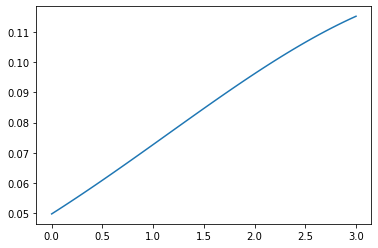

In [15]:
import numpy as np 
import matplotlib.pyplot as plt 
     
distribution = np.linspace(0, np.minimum(rv.dist.b, 3)) 
print("Distribution : \n", distribution) 
     
plot = plt.plot(distribution, rv.pdf(distribution)) 